### Import Libraries

In [12]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

for dirname,_,filenames in os.walk("models"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

models\DenseNet201_model.h5


### Model Loading

In [2]:
model=load_model(filepath="models/DenseNet201_model.h5")

$$Class$$$$Labels$$

In [3]:
class_labels=['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Lime_Bad', 'Lime_Good']

In [4]:
explainer = lime_image.LimeImageExplainer()

$$User$$$$Input$$

In [19]:
image_path="input/val/Lime_Good/IMG20200728131610.jpg"

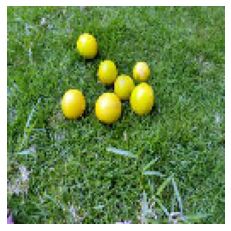

In [20]:
image=load_img(image_path, grayscale=False, color_mode='rgb', target_size=(128,128,3))
plt.imshow(image)
plt.axis("off")
plt.show()

$$Preprocessing$$$$InputData$$

In [21]:
image=img_to_array(image)
image=image/255.0
normalized_img = np.expand_dims(image, axis=0)

$$Model$$$$Prediction$$

In [22]:
model_prediction = model.predict(normalized_img)
model_class=np.argmax(model_prediction[0])
model_label=class_labels[model_class]
print("Fruit : %s" % model_label.split("_")[0])
print(f"model predicted class is -> {model_class}")
print(f"model predicted label is -> {model_label}")

1/1 [==============================] - 0s 87ms/step
Fruit : Lime
model predicted class is -> 5
model predicted label is -> Lime_Good


In [23]:
exp = explainer.explain_instance(normalized_img[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=6)

  0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 273ms/step


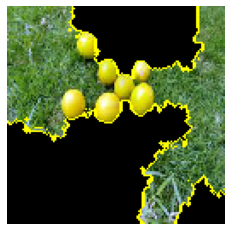

In [24]:
def generate_prediction_sample(exp, exp_class, weight = 0.0, show_positive = True, hide_background = True):
    image, mask = exp.get_image_and_mask(exp_class, positive_only=show_positive, num_features=6, hide_rest=hide_background,min_weight=weight)
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

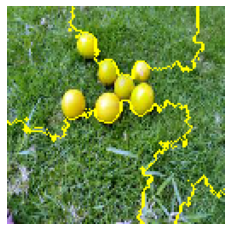

In [25]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)

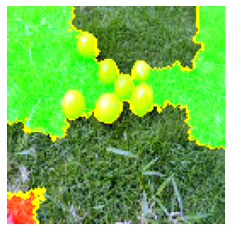

In [26]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = False, hide_background = False)

---